# Homework 1

#### Nawat Ngerncham

In [1]:
import numpy as np
import seaborn as sns
from typing import List

# these are the ones I wrote myself
from tsp_algorithms.two_swap import two_swap_tsp
from tsp_algorithms.two_opt import two_opt_tsp
from tsp_algorithms.random_sampling import random_sampling_tsp

In [2]:
def get_distance(dist_data: np.array, city1: int, city2: int):
    return dist_data[city1, city2]


def compute_path_distance(dist_data: np.array, path: List[int]) -> float:
    path_to_use = path + [path[0]]
    return np.sum([get_distance(dist_data, x, y) for x, y in zip(path_to_use[:-1], path_to_use[1:])])


def generate_city_list(no_cities: int) -> List[int]:
    return [x for x in range(no_cities)]

## GR17

In [3]:
gr17 = np.loadtxt("data/gr17_d.txt", dtype=np.int32)
gr17_city_count, _ = gr17.shape
gr17_path_dist = lambda p: compute_path_distance(gr17, p)
# gr17

In [4]:
# gr17_ts_res = two_swap_tsp(generate_city_list(gr17_city_count), gr17_path_dist, 1_000_000)
# gr17_to_res = two_opt_tsp(generate_city_list(gr17_city_count), gr17_path_dist, 1_000_000)
# gr17_rs_res = random_sampling_tsp(generate_city_list(gr17_city_count), gr17_path_dist, 1_000_000)

In [5]:
# gr17_ts_res, gr17_to_res, gr17_rs_res

In [6]:
from experiment import run_experiment

df = run_experiment("data/gr17_d.txt", "")
df

,0,1,2,3,4,5,6,7,8,9
0,4722,4722,4722,4722,4722,4722,4722,4722,4722,4722
1,4703,4619,4722,4722,4722,4722,4722,4464,4409,4101
2,4385,4619,4676,4722,4722,4722,4722,4086,4389,3862
3,4294,4619,4676,4722,4410,4722,4722,4086,4389,3590
4,4294,4526,4668,4722,4410,4722,4722,4086,4389,3538
5,3955,4526,4651,4722,4410,4626,4357,4086,4389,3538
6,3955,4282,4651,4722,4410,4626,4212,4086,4374,3538
7,3955,4282,4651,4626,4410,4626,4212,4086,4374,3538
8,3860,3541,4493,4626,4351,4626,4212,3938,4210,3538
9,3860,3524,4493,4626,4351,4626,4126,3938,4108,3538


<Axes: >

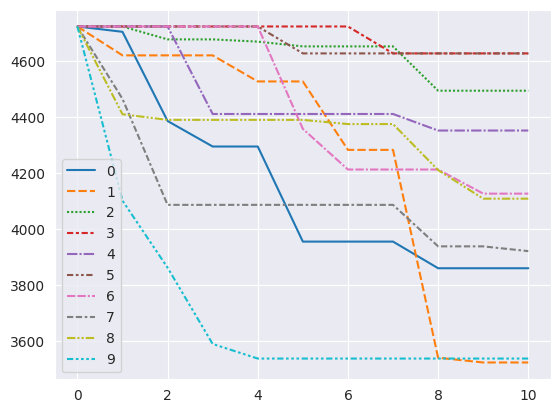

In [7]:
sns.lineplot(df)